<a href="https://colab.research.google.com/github/natalie2103/CS103/blob/main/act4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive


Mounted at /gdrive
/gdrive


**Data Reading**

In [6]:
import pandas as pd
performance_data = pd.read_csv("/gdrive/MyDrive/Colab Notebooks/StudentsPerformance.csv")

performance_data.head()

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,average,Grade,Passed / Failed,Output
0,female,group B,bachelor's degree,none,72,72,74,72.67,C,PASSED,1
1,female,group C,some college,completed,69,90,88,82.33,F,FAILED,0
2,female,group B,master's degree,none,90,95,93,92.67,A,PASSED,1
3,male,group A,associate's degree,none,47,57,44,49.33,F,FAILED,0
4,male,group C,some college,none,76,78,75,76.33,C,PASSED,1


In [7]:
performance_data.tail()

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,average,Grade,Passed / Failed,Output
995,female,group E,master's degree,completed,88,99,95,94.00,B,PASSED,1
996,male,group C,high school,none,62,55,55,57.33,F,FAILED,0
997,female,group C,high school,completed,59,71,65,65.00,F,FAILED,0
998,female,group D,some college,completed,68,78,77,74.33,F,FAILED,0
999,female,group D,some college,none,77,86,86,83.00,C,PASSED,1


**List of data types**

In [8]:
performance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   test preparation course      1000 non-null   object 
 4   math score                   1000 non-null   int64  
 5   reading score                1000 non-null   int64  
 6   writing score                1000 non-null   int64  
 7   average                      1000 non-null   float64
 8   Grade                        1000 non-null   object 
 9   Passed / Failed              1000 non-null   object 
 10  Output                       1000 non-null   int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 86.1+ KB


**Checking for null values**

In [23]:
print(performance_data.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
average                        0
Grade                          0
Passed / Failed                0
Output                         0
dtype: int64


**Summarizing the data**

In [9]:
performance_data.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.08900,15.163080,0.0,57.00,66.00,77.00,100.0
reading score,1000.0,69.16900,14.600192,17.0,59.00,70.00,79.00,100.0
writing score,1000.0,68.05400,15.195657,10.0,57.75,69.00,79.00,100.0
average,1000.0,67.77058,14.257311,9.0,58.33,68.33,77.67,100.0
Output,1000.0,0.40900,0.491895,0.0,0.00,0.00,1.00,1.0


**Data Visualization**

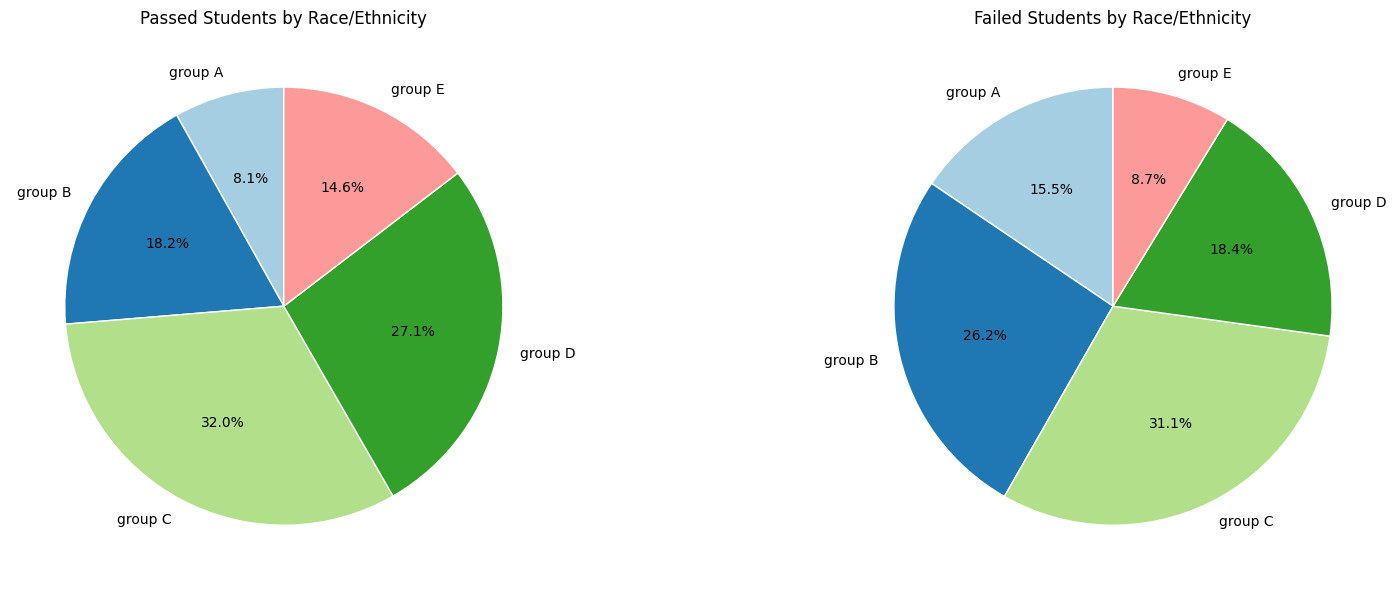

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

performance_data = pd.read_csv("/gdrive/MyDrive/Colab Notebooks/StudentsPerformance.csv")
performance_data['average_score'] = performance_data[['math score', 'reading score', 'writing score']].mean(axis=1)
performance_data['passed or failed'] = performance_data['average_score'].apply(lambda x: 'Passed' if x >= 50 else 'Failed')
grouped_data = performance_data.groupby(['race/ethnicity', 'passed or failed']).size().unstack(fill_value=0)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
axes[0].pie(
    grouped_data['Passed'],
    labels=grouped_data.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors,
    wedgeprops=dict(edgecolor='w')
)
axes[0].set_title('Passed Students by Race/Ethnicity')

axes[1].pie(
    grouped_data['Failed'],
    labels=grouped_data.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors,
    wedgeprops=dict(edgecolor='w')
)
axes[1].set_title('Failed Students by Race/Ethnicity')
plt.tight_layout()
plt.show()


**Conclusion:** The pie charts suggest that Group C and Group D generally perform better than Group A and Group E in terms of passing rates. However, it's important to consider the sample sizes of each group to draw more definitive conclusions.*italicized text*

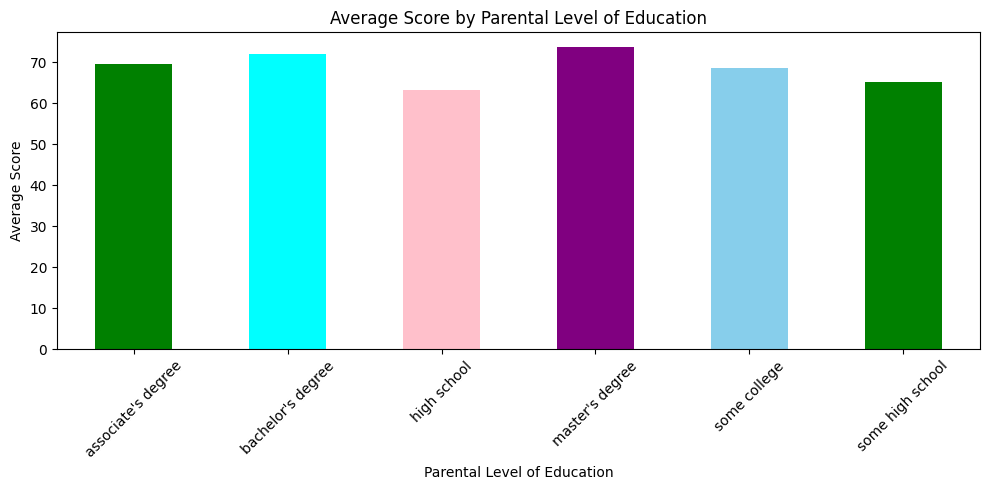

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

performance_data = pd.read_csv("/gdrive/MyDrive/Colab Notebooks/StudentsPerformance.csv")
performance_data['average_score'] = performance_data[['math score', 'reading score', 'writing score']].mean(axis=1)
grouped_data = performance_data.groupby('parental level of education')['average_score'].mean()
plt.subplots(figsize=(10, 5))
grouped_data.plot.bar(color=['green', 'cyan', 'pink', 'purple', 'skyblue'])
plt.title('Average Score by Parental Level of Education')
plt.xlabel('Parental Level of Education')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Conclusion:** The visualization suggests a positive correlation between parental education level and student performance. While students with a "master's degree" generally excel, the impact of parental education might be less pronounced for lower levels of education.

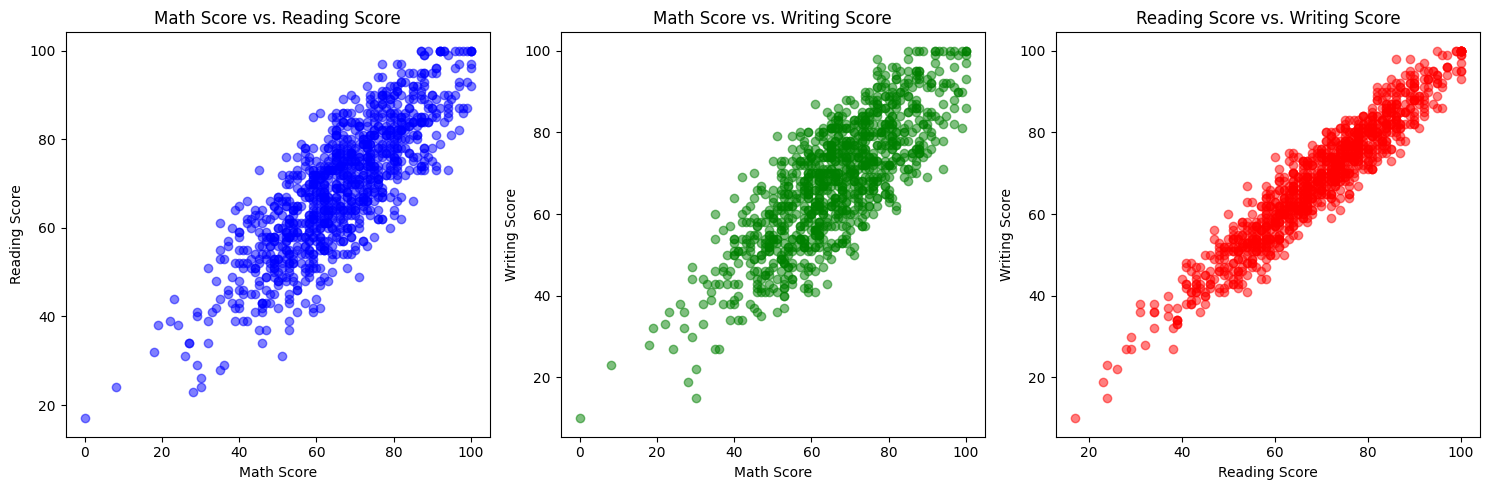

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

performance_data = pd.read_csv("/gdrive/MyDrive/Colab Notebooks/StudentsPerformance.csv")

plt.figure(figsize=(15, 5))

# Scatter plot: Math score vs. Reading score
plt.subplot(1, 3, 1)
plt.scatter(performance_data['math score'], performance_data['reading score'], color='blue', alpha=0.5)
plt.title('Math Score vs. Reading Score')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')

# Scatter plot: Math score vs. Writing score
plt.subplot(1, 3, 2)
plt.scatter(performance_data['math score'], performance_data['writing score'], color='green', alpha=0.5)
plt.title('Math Score vs. Writing Score')
plt.xlabel('Math Score')
plt.ylabel('Writing Score')

# Scatter plot: Reading score vs. Writing score
plt.subplot(1, 3, 3)
plt.scatter(performance_data['reading score'], performance_data['writing score'], color='red', alpha=0.5)
plt.title('Reading Score vs. Writing Score')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')

plt.tight_layout()
plt.show()

**Conclusion:** The scatter plots suggest that there are positive relationships between all three subjects (math, reading, and writing). This implies that students who excel in one subject are more likely to perform well in the others. The strongest correlation is found between reading and writing scores, suggesting a particularly close association between these two subjects.

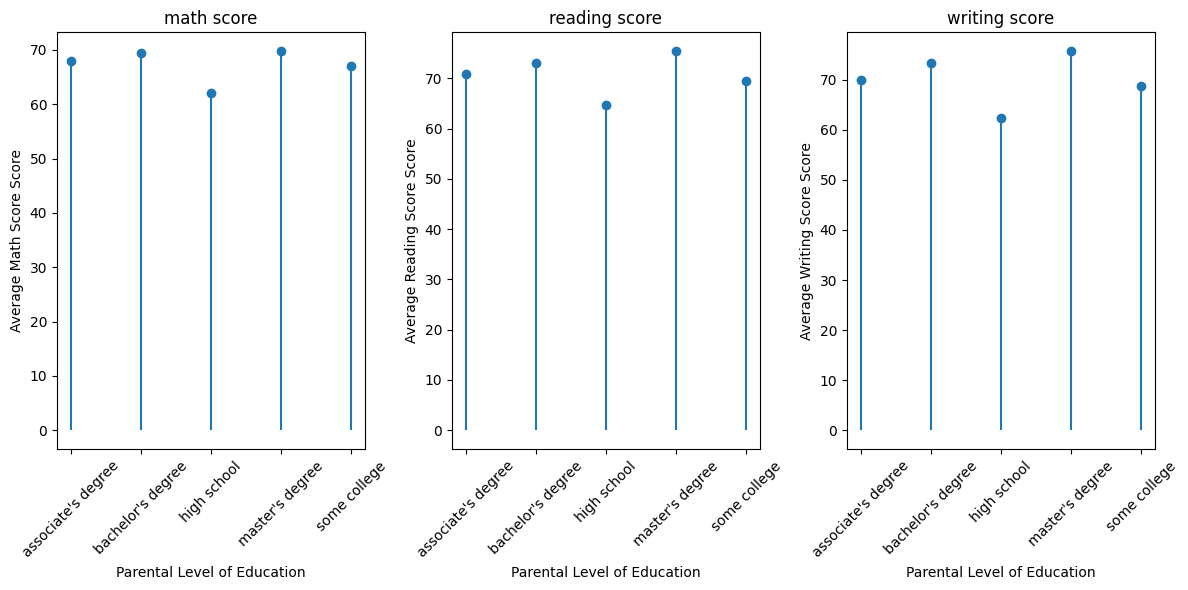

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

performance_data = pd.read_csv("/gdrive/MyDrive/Colab Notebooks/StudentsPerformance.csv")
attributes = ['math score', 'reading score', 'writing score']
grouped_data = performance_data.groupby('parental level of education')[attributes].mean()
grouped_data = grouped_data.head(5)
fig, axes = plt.subplots(nrows=1, ncols=len(attributes), figsize=(12, 6))

for i, attribute in enumerate(attributes):
  axes[i].stem(grouped_data.index, grouped_data[attribute], basefmt=' ')
  axes[i].set_title(attribute)
  axes[i].set_xlabel('Parental Level of Education')
  axes[i].set_ylabel(f'Average {attribute.title()} Score')
  plt.sca(axes[i])
  plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Conclusion:** The chart suggests a positive correlation between parental education level and student performance in math, reading, and writing. While students with a "master's degree" generally excel in all three subjects.

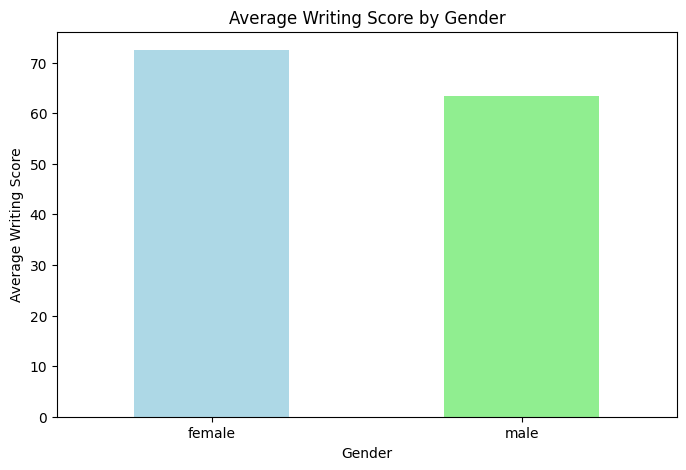

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

performance_data = pd.read_csv("/gdrive/MyDrive/Colab Notebooks/StudentsPerformance.csv")
average_math_score_by_gender = performance_data.groupby('gender')['writing score'].mean()

plt.figure(figsize=(8, 5))
average_math_score_by_gender.plot.bar(color=['lightblue', 'lightgreen'])
plt.title('Average Writing Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Writing Score')
plt.xticks(rotation=0)
plt.show()

**Conclusion:** The bar chart illustrates the average writing score by gender. Based on the data, females have a slightly higher average writing score than males. This suggests a potential gender-based difference in writing performance among the students in the dataset.